# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Cash\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Download/Update the VADER Lexicon
nltk.download("vader_lexicon")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Cash\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")



In [4]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [5]:
#Fetch the Bitcoin news Articles
#YOUR CODE HERE!
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en")
bitcoin_headlines

{'status': 'ok',
 'totalResults': 4445,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Timothy B. Lee, Ars Technica',
   'title': 'An Engineer Gets 9 Years for Stealing $10M From Microsoft',
   'description': 'The defendant tried—and failed—to use bitcoin to cover his tracks.',
   'url': 'https://www.wired.com/story/an-engineer-gets-9-years-for-stealing-dollar10m-from-microsoft/',
   'urlToImage': 'https://media.wired.com/photos/5fac6afb446b4639b3d5b8d8/191:100/w_1280,c_limit/Security-Microsoft-1229426260.jpg',
   'publishedAt': '2020-11-12T14:00:00Z',
   'content': "A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]"},
  {'source': {'id': None, 'name': 'Lifehacker.com'},
   'author': 'Mike Winters on Two Cents, shared by Mike Winters to Lifehacker',
   'title': 'Is the New Visa Bitcoin Rewards Card

In [6]:
#Print total articles
print(f"total articles about Bitcoin:{bitcoin_headlines['totalResults']}")


total articles about Bitcoin:4445


In [7]:
#Transform the articles to a dataframe DELETE
bitcoin_df = pd.DataFrame.from_dict(bitcoin_headlines["articles"])
bitcoin_df.head(5)

,author,content,description,publishedAt,source,title,url,urlToImage
0,"Timothy B. Lee, Ars Technica",A former Microsoft software engineer from Ukra...,The defendant tried—and failed—to use bitcoin ...,2020-11-12T14:00:00Z,"{'id': 'wired', 'name': 'Wired'}",An Engineer Gets 9 Years for Stealing $10M Fro...,https://www.wired.com/story/an-engineer-gets-9...,https://media.wired.com/photos/5fac6afb446b463...
1,"Mike Winters on Two Cents, shared by Mike Wint...",Visa has partnered with cryptocurrency startup...,Visa has partnered with cryptocurrency startup...,2020-12-03T22:00:00Z,"{'id': None, 'name': 'Lifehacker.com'}",Is the New Visa Bitcoin Rewards Card Worth It?,https://twocents.lifehacker.com/is-the-new-vis...,https://i.kinja-img.com/gawker-media/image/upl...
2,Karissa Bell,PayPal is bringing its newly-announced support...,PayPal is bringing its newly-announced support...,2020-11-12T21:05:41Z,"{'id': 'engadget', 'name': 'Engadget'}","PayPal now lets all US users buy, sell and hol...",https://www.engadget.com/paypal-opens-cryptocu...,https://o.aolcdn.com/images/dims?resize=1200%2...
3,Stan Schroeder,"In November 2017, after an absolutely massive,...","In November 2017, after an absolutely massive,...",2020-11-20T20:02:17Z,"{'id': 'mashable', 'name': 'Mashable'}","Bitcoin is flirting with $20,000 again. How hi...",https://mashable.com/article/bitcoin-20000/,https://mondrian.mashable.com/2020%252F11%252F...
4,Jon Fingas,"Unlike ‘conventional’ cryptocurrencies, a cent...",China’s official digital currency is now usabl...,2020-12-06T22:37:18Z,"{'id': 'engadget', 'name': 'Engadget'}",You can now spend China's digital currency at ...,https://www.engadget.com/jd-com-supports-china...,https://o.aolcdn.com/images/dims?resize=1200%2...


In [8]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_headlines = newsapi.get_everything(q="Ethereum", language="en")
ethereum_headlines

{'status': 'ok',
 'totalResults': 1223,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Karissa Bell',
   'title': 'PayPal now lets all US users buy, sell and hold cryptocurrency',
   'description': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only available to a small subset of PayPal account holders. That’s…',
   'url': 'https://www.engadget.com/paypal-opens-cryptocurrency-all-us-accounts-210541778.html',
   'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-11%2F4e1af080-2528-11eb-bbdf-193e571d142a&client=amp-blogside-v2&signature=22ad23dde6ee3e667a8067a4c39e1962659cec92',
   'publishedAt': '2020-11-12T21:05:41Z',
   'content': 'PayPal is bringing its newly-announced support for cryptoc

In [9]:
#Print total articles
print(f"total articles about Ethereum:{ethereum_headlines['totalResults']}")

total articles about Ethereum:1223


In [10]:
#Transform the articles to a dataframe DELETE
ethereum_df = pd.DataFrame.from_dict(ethereum_headlines["articles"])
ethereum_df.head(5)

,author,content,description,publishedAt,source,title,url,urlToImage
0,Karissa Bell,PayPal is bringing its newly-announced support...,PayPal is bringing its newly-announced support...,2020-11-12T21:05:41Z,"{'id': 'engadget', 'name': 'Engadget'}","PayPal now lets all US users buy, sell and hol...",https://www.engadget.com/paypal-opens-cryptocu...,https://o.aolcdn.com/images/dims?resize=1200%2...
1,Tom Wilson,FILE PHOTO: Representation of the Ethereum vir...,Digital currencies Ethereum and XRP soared on ...,2020-11-23T14:16:00Z,"{'id': 'reuters', 'name': 'Reuters'}",Smaller digital coins soar as bitcoin powers o...,https://in.reuters.com/article/us-crypto-curre...,https://static.reuters.com/resources/r/?m=02&d...
2,Tom Wilson,LONDON (Reuters) - Digital currencies Ethereum...,Digital currencies Ethereum and XRP soared on ...,2020-11-23T14:48:00Z,"{'id': 'reuters', 'name': 'Reuters'}",Smaller digital coins soar as bitcoin powers o...,https://in.reuters.com/article/us-crypto-curre...,https://static.reuters.com/resources/r/?m=02&d...
3,Tom Wilson,FILE PHOTO: Representation of the Ethereum vir...,Digital currencies Ethereum and XRP soared on ...,2020-11-23T14:16:00Z,"{'id': 'reuters', 'name': 'Reuters'}",Smaller digital coins soar as bitcoin powers o...,https://www.reuters.com/article/us-crypto-curr...,https://static.reuters.com/resources/r/?m=02&d...
4,Gertrude Chavez-Dreyfuss,NEW YORK (Reuters) - Institutional investors p...,Institutional investors pumped $429 million in...,2020-12-07T20:26:00Z,"{'id': 'reuters', 'name': 'Reuters'}",Crypto fund inflows hit second highest on reco...,https://uk.reuters.com/article/us-crypto-curre...,https://s1.reutersmedia.net/resources_v2/image...


In [11]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_sentiments = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
bitcoin_sentiments = bitcoin_sentiments[cols]

bitcoin_sentiments.head()

        

,Compound,Negative,Neutral,Positive,Text
0,-0.6705,0.199,0.737,0.064,A former Microsoft software engineer from Ukra...
1,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
2,0.2144,0.000,0.947,0.053,PayPal is bringing its newly-announced support...
3,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."
4,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."


In [12]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "Text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_sentiments = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
ethereum_sentiments = ethereum_sentiments[cols]

ethereum_sentiments.head()
        

,Compound,Negative,Neutral,Positive,Text
0,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
4,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...


In [13]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_sentiments.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.135189,0.025737,0.913737,0.060526
std,0.379635,0.066192,0.098593,0.065557
min,-0.670500,0.000000,0.716000,0.000000
25%,0.000000,0.000000,0.833500,0.000000
50%,0.000000,0.000000,0.950000,0.050000
75%,0.411700,0.000000,1.000000,0.102500
max,0.765000,0.215000,1.000000,0.174000


In [14]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_sentiments.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.151905,0.016800,0.921600,0.061600
std,0.322903,0.052501,0.103898,0.078815
min,-0.493900,0.000000,0.672000,0.000000
25%,0.000000,0.000000,0.881500,0.000000
50%,0.000000,0.000000,0.948000,0.052000
75%,0.406800,0.000000,1.000000,0.095250
max,0.877900,0.196000,1.000000,0.318000


In [15]:
#Questions:
#Q: Which coin had the highest mean positive score?

#A:Ethereum had the highest mean positive score of 0.0733

#Q: Which coin had the highest compound score?

#A:Ethereum had the highest compound score of 0.9468

#Q. Which coin had the highest positive score?

#A Ethereum had the highest positivity score of 0.318

### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import reuters, stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
abc = WordNetLemmatizer()
stopwrds = stopwords.words("english")
stopwrds.append("'s")
stopwrds.append("a…")
stopwrds.append("…")
stopwrds.append("u")
stopwrds = set(stopwrds)


In [18]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    # Remove the stop words
    words = [word.lower() for word in words if word.lower() not in stopwrds]

    
    # Remove the punctuation
    words = [word.lower() for word in words if word.lower() not in punctuation]

    
    # Lemmatize Words into root words
    tokens = [abc.lemmatize(word) for word in words]
    
    return tokens


In [19]:
tokenizer(ethereum_sentiments["Text"][0])

['paypal',
 'bringing',
 'newly-announced',
 'support',
 'cryptocurrency',
 'u',
 'account',
 'first',
 'announced',
 'plan',
 'open',
 'cryptocurrency',
 'trading',
 'us-based',
 'user',
 'october',
 '+589',
 'char']

In [20]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!

bitcoin_sentiments["Tokens"] = bitcoin_sentiments["Text"].apply(tokenizer)
bitcoin_sentiments.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.6705,0.199,0.737,0.064,A former Microsoft software engineer from Ukra...,"[former, microsoft, software, engineer, ukrain..."
1,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visa, partnered, cryptocurrency, startup, blo..."
2,0.2144,0.000,0.947,0.053,PayPal is bringing its newly-announced support...,"[paypal, bringing, newly-announced, support, c..."
3,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[november, 2017, absolutely, massive, two-mont..."
4,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, ‘, conventional, ’, cryptocurrencies,..."


In [21]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_sentiments["Tokens"] = ethereum_sentiments["Text"].apply(tokenizer)
ethereum_sentiments.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...,"[paypal, bringing, newly-announced, support, c..."
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[london, reuters, digital, currency, ethereum,..."
3,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
4,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,"[new, york, reuters, institutional, investor, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [22]:
from collections import Counter
from nltk import ngrams

In [23]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
# bigram_counts = Counter(ngrams(processed, n=2))
# print(dict(bigram_counts))
bitcoin_gram = ngrams(tokenizer(bitcoin_sentiments["Text"].str.cat()), n=2)
Counter(bitcoin_gram).most_common(20)
# print(dict(bigram_counts))

[(('file', 'photo'), 6),
 (('photo', 'representation'), 6),
 (('virtual', 'currency'), 5),
 (('representation', 'virtual'), 4),
 (('currency', 'bitcoin'), 4),
 (('illustration', 'taken'), 4),
 (('2020', 'reuters/dado'), 4),
 (('reuters/dado', 'ruvic/illustration'), 4),
 (('char', 'reuters'), 3),
 (('reuters', 'staff'), 3),
 (('staff', 'file'), 3),
 (('ruvic/illustration', 'london'), 3),
 (('former', 'microsoft'), 2),
 (('microsoft', 'software'), 2),
 (('software', 'engineer'), 2),
 (('engineer', 'ukraine'), 2),
 (('ukraine', 'sentenced'), 2),
 (('sentenced', 'nine'), 2),
 (('nine', 'year'), 2),
 (('year', 'prison'), 2)]

In [24]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_gram = ngrams(tokenizer(ethereum_sentiments["Text"].str.cat()), n=2)
Counter(ethereum_gram).most_common(20)

[(('virtual', 'currency'), 8),
 (('file', 'photo'), 7),
 (('photo', 'representation'), 7),
 (('char', 'reuters'), 6),
 (('reuters', 'staff'), 6),
 (('representation', 'virtual'), 6),
 (('currency', 'bitcoin'), 6),
 (('illustration', 'taken'), 6),
 (('2020', 'reuters/dado'), 6),
 (('seen', 'illustration'), 5),
 (('reuters/dado', 'ruvic/illustration'), 5),
 (('new', 'york'), 5),
 (('bitcoin', 'seen'), 5),
 (('taken', 'november'), 5),
 (('november', '19'), 5),
 (('19', '2020'), 5),
 (('london', 'reuters'), 4),
 (('york', 'reuters'), 4),
 (('staff', 'file'), 4),
 (('representation', 'ethereum'), 3)]

In [25]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [26]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!

bitcoin_gram = tokenizer(bitcoin_sentiments["Text"].str.cat())
token_count(bitcoin_gram)

[('char', 19),
 ('bitcoin', 13),
 ('currency', 7),
 ('photo', 7),
 ('file', 6),
 ('representation', 6),
 ('virtual', 6),
 ('reuters', 6),
 ('cryptocurrency', 5),
 ('illustration', 5)]

In [27]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
ethereum_gram = tokenizer(ethereum_sentiments["Text"].str.cat())
token_count(ethereum_gram)

[('char', 20),
 ('reuters', 14),
 ('bitcoin', 12),
 ('photo', 10),
 ('representation', 9),
 ('virtual', 9),
 ('currency', 9),
 ('illustration', 8),
 ('reuters/dado', 8),
 ('file', 7)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [29]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def wordcloud(words):
    cloud = WordCloud(colormap=None).generate(words.str.cat())
    plt.imshow(cloud)
    plt.axis("off")
    plt.title("Cloud")
    plt.show()
    return ""



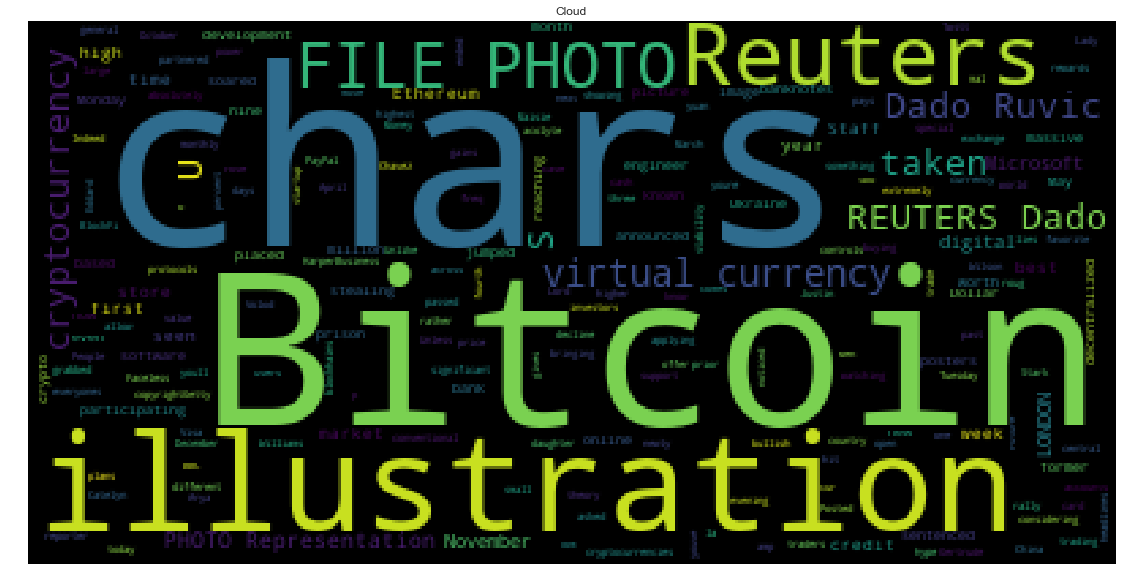

''

In [30]:
wordcloud(bitcoin_sentiments["Text"])


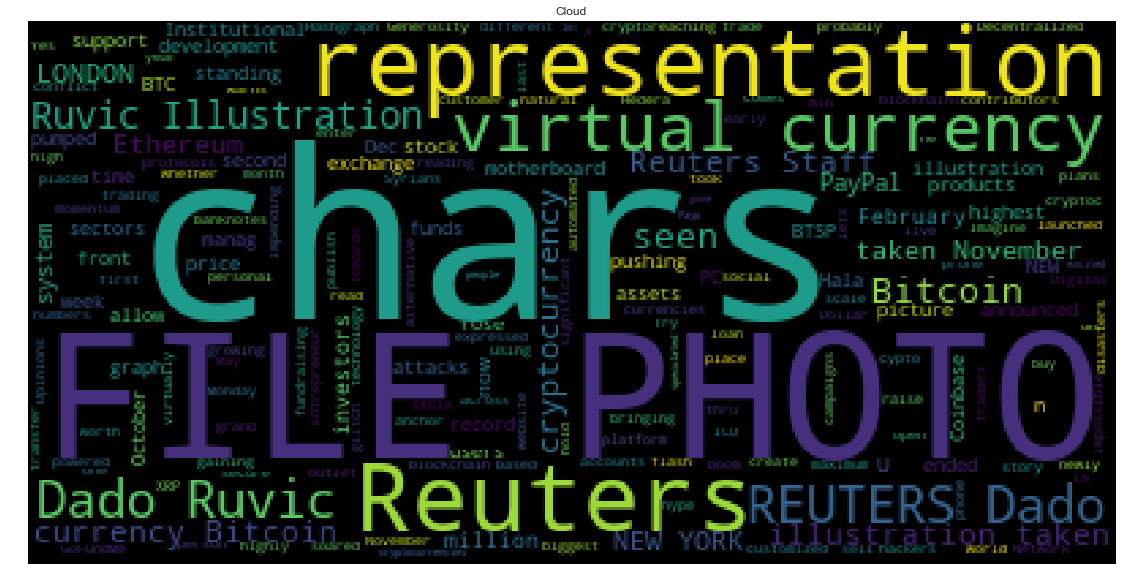

''

In [31]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud(ethereum_sentiments["Text"])

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [32]:
import spacy
from spacy import displacy
from nltk.corpus import reuters

In [33]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [34]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [35]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
bitcoin_text = (bitcoin_sentiments["Text"].str.cat())
bitcoin_text
#bitcoin_text = reuters.raw(fileids = reuters.fileids(categories = 'food')[0])
#doc = nlp(bitcoin_text)
#display.render(doc, style='ent')

"A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars]In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars]Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives the c

In [36]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin_text = nlp(bitcoin_text)
#for ent in doc.ents
   # print(ent.text,ent.label)

# Add a title to the document
# YOUR CODE HERE!
bitcoin_text.user_data["title"]="Bitcoin NER"

In [37]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_text, style='ent')

In [38]:
# List all Entities
# YOUR CODE HERE!
entities = [(ent.text, ent.label_) for ent in bitcoin_text.ents]
entities

[('Microsoft', 'ORG'),
 ('Ukraine', 'GPE'),
 ('nine years', 'DATE'),
 ('more than $10 million', 'MONEY'),
 ('Microsoft', 'ORG'),
 ('2016 to 2018', 'DATE'),
 ('first', 'ORDINAL'),
 ('Bitcoin', 'GPE'),
 ('US', 'GPE'),
 ('first', 'ORDINAL'),
 ('US', 'GPE'),
 ('October', 'DATE'),
 ('November 2017', 'DATE'),
 ('two-month', 'DATE'),
 ('Bitcoin', 'GPE'),
 ('10,000', 'MONEY'),
 ('first', 'ORDINAL'),
 ('the next 20 days', 'DATE'),
 ('19,665', 'MONEY'),
 ('digital yuan', 'ORG'),
 ('the People’s Bank of China', 'ORG'),
 ('the past few weeks', 'DATE'),
 ('bitcoin', 'GPE'),
 ('digital', 'ORG'),
 ('hype', 'GPE'),
 ('chars]4', 'FAC'),
 ('U.S.', 'GPE'),
 ('November', 'DATE'),
 ('today', 'DATE'),
 ('500', 'CARDINAL'),
 ('10.8 percent', 'PERCENT'),
 ('November', 'DATE'),
 ('monthly', 'DATE'),
 ('April', 'DATE'),
 ('fourth', 'ORDINAL'),
 ('Williams', 'PERSON'),
 ('Arya Stark', 'PERSON'),
 ('Lady Catelyn', 'PERSON'),
 ('Eddard', 'PERSON'),
 ('acolyte', 'PERSON'),
 ('the Faceless Men', 'WORK_OF_ART'),
 ('M

---

## Ethereum NER

In [39]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
ethereum_text = (ethereum_sentiments["Text"].str.cat())
ethereum_text

"PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the sec

In [40]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ethereum_text = nlp(ethereum_text)
#for ent in doc.ents
   # print(ent.text,ent.label)

# Add a title to the document
# YOUR CODE HERE!
ethereum_text.user_data["title"]="Ethereum NER"

In [41]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethereum_text, style='ent')

In [42]:
# List all Entities
# YOUR CODE HERE!
entities = [(ent.text, ent.label_) for ent in ethereum_text.ents]
entities

[('PayPal', 'PRODUCT'),
 ('US', 'GPE'),
 ('first', 'ORDINAL'),
 ('US', 'GPE'),
 ('October', 'DATE'),
 ('February 3, 2018', 'DATE'),
 ('REUTERS/', 'ORG'),
 ('Reuters', 'ORG'),
 ('Reuters', 'ORG'),
 ('XRP', 'ORG'),
 ('Monday', 'DATE'),
 ('February 3, 2018', 'DATE'),
 ('REUTERS/', 'ORG'),
 ('Reuters', 'ORG'),
 ('YORK', 'PERSON'),
 ('Reuters', 'ORG'),
 ('$429 million', 'MONEY'),
 ('the week ended Dec. 7', 'DATE'),
 ('second', 'ORDINAL'),
 ('YORK', 'PERSON'),
 ('Reuters', 'ORG'),
 ('$429 million', 'MONEY'),
 ('the week ended Dec. 7', 'DATE'),
 ('second', 'ORDINAL'),
 ('the Generosity Network', 'ORG'),
 ('20,000', 'MONEY'),
 ('Reuters', 'ORG'),
 ('Bitcoin', 'GPE'),
 ('November 19, 2020', 'DATE'),
 ('REUTERS/', 'ORG'),
 ('Reuters', 'ORG'),
 ('Bitcoin', 'GPE'),
 ('November 19, 2020', 'DATE'),
 ('REUTERS/', 'ORG'),
 ('chars]The New York Times', 'ORG'),
 ('Coinbase', 'ORG'),
 ('early February this year', 'DATE'),
 ('last month', 'DATE'),
 ('October', 'DATE'),
 ('$24 million', 'MONEY'),
 ('8, 202